In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
import fredapi as fa


#ML
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
import hvplot.pandas
import xgboost as xgb


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
#FRED DATA
fred = fa.Fred(api_key='467827ab5d3d05c7881f60e1fd180ed8')

In [4]:
gdp = fred.get_series('INDLORSGPTDSTSAM')
cpi = fred.get_series('CPIAUCSL')

In [60]:
df = pd.concat([gdp, cpi], join = 'inner', axis =1)
df.columns = ['gdp', 'cpi']
df5 = df.dropna(axis =0)

df6 = df5.pct_change()
df7= df6.dropna(axis =0)

In [32]:
X = df7['cpi'].values.reshape(-1,1)

y = df7['gdp']

In [7]:
model = LinearRegression().fit(X, df7['gdp'])

<AxesSubplot:xlabel='pred', ylabel='actual'>

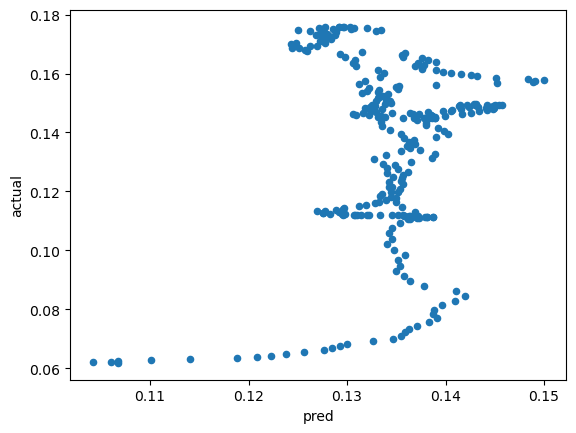

In [8]:
prediction = model.predict(X)

prediction_df = pd.DataFrame(prediction, index = df7.index)
prediction_df['actual'] = df7['gdp']
prediction_df.columns = ['pred', 'actual']
prediction_df.plot(kind = 'scatter', y='actual', x='pred')

# Logistic Regression

Probability of Good Credit = 1 / 1 + e ^ (- independent variable) >> Converts to a probability

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
recession = fred.get_series('JHDUSRGDPBR')

In [63]:
combined_new = pd.concat([df5, recession], join = 'inner', axis =1)

y1 = combined_new[0]

X1 = combined_new[['gdp', 'cpi']].values.reshape(-1,2)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y1,
                                                    random_state = 1,
                                                    stratify = y1,
                                                    test_size = 0.33)

In [65]:
classifier = LogisticRegression().fit(X_train, y_train)

In [66]:
classifier.score(X_test, y_test)

0.8857142857142857

<AxesSubplot:>

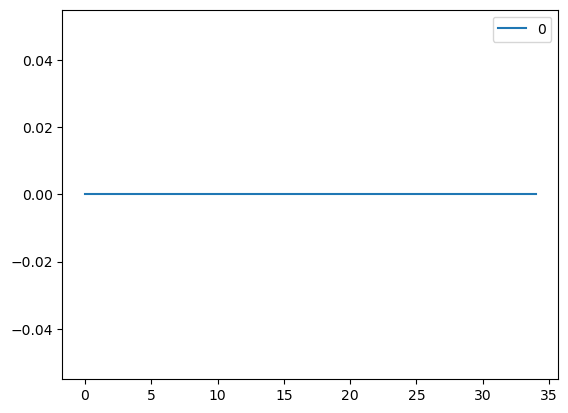

In [67]:
predictions = classifier.predict(X_test)
predictions1 = pd.DataFrame(predictions)
predictions1.plot()

# COnfusion Matrix

Reverals the number of true negatives and true positives (actuals) for each cateogiral class ..... e.g. comparing the 0 and 1's for actual vs predicted....

Describes the performance of classificaiton models, is it comprehensive, accurate and precise..........

## Classificaiton report 

classification_report(y_trst, predictions, target_names = target names)

<br>

<br>

# Non-Linear Models:

Support vector machines - classification. We have data and imsample "status", then we use that fit to predict whether teh status is denied or approved on the OOS:

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
loans = pd.read_csv('loans (1).csv')
loans

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve
...,...,...,...,...,...,...
95,0.360945,0.823295,0.542451,0.224285,0.328504,approve
96,0.114420,0.107174,0.619564,0.370300,0.047719,deny
97,0.309276,0.692433,0.483730,0.328953,0.304493,approve
98,0.549153,0.301588,0.651869,0.717826,0.602004,approve


In [47]:
X = loans.drop(columns = ['status'])
y = loans['status']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 1,
                                                    stratify = y,
                                                    test_size = 0.33)

In [46]:
model =  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False).fit(X_train,y_train)

y_pred = model.predict(X_test)
results = pd.DataFrame({"pred":y_pred, "actual":y_test}).reset_index(drop=True)
results.head()

,pred,actual
0,approve,deny
1,approve,approve
2,deny,approve
3,approve,approve
4,deny,deny


In [34]:
model.score(X_train, y_train)

0.6268656716417911

In [35]:
model.score(X_test, y_test)

0.5757575757575758

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     approve       0.56      0.62      0.59        16
        deny       0.60      0.53      0.56        17

    accuracy                           0.58        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.58      0.58      0.57        33



In [26]:
print(confusion_matrix(y_test, y_pred))

[[10  6]
 [ 8  9]]


In [41]:
y_pred

array(['approve', 'approve', 'deny', 'approve', 'deny', 'approve', 'deny',
       'deny', 'approve', 'deny', 'deny', 'deny', 'deny', 'approve',
       'deny', 'approve', 'deny', 'deny', 'deny', 'approve', 'approve',
       'approve', 'approve', 'approve', 'approve', 'approve', 'approve',
       'approve', 'deny', 'deny', 'approve', 'deny', 'approve'],
      dtype=object)

# Decision Tree + Rand. Forest

In [59]:
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier

In [54]:
loan_e = pd.read_csv('sba_loans_encoded.csv')
loan_e

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,2006,6,150000,60,92346,0,5,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2093,1997,4,99000,300,92021,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2094,1997,2,50000,84,93012,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2095,1997,1,251150,120,91352,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X = loan_e.drop(columns = ['Default'])

#y = loan_e['Default']

y = loan_e['Default'].values.reshape(-1,1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 1,
                                                    stratify = y,
                                                    test_size = 0.33)

In [108]:
X_train_scaled = StandardScaler().fit_transform(X_train)

X_test_scaled = StandardScaler().fit_transform(X_test)

In [109]:
model = RandomForestClassifier(n_estimators= 500, random_state= 78).fit(X_train_scaled, y_train) # random_state allows for same sampling

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [110]:
y_pred = model.predict(X_test_scaled)

#res = pd.DataFrame({'pred': y_pred, 'actual': y_test}).reset_index(drop=True)

#res.plot(kind = 'line', rot = 90)

In [111]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1']
)

cm_df

,Predicted 0,Predicted 1
Actual 0,438,28
Actual 1,39,188


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       466
           1       0.87      0.83      0.85       227

    accuracy                           0.90       693
   macro avg       0.89      0.88      0.89       693
weighted avg       0.90      0.90      0.90       693



In [113]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9033189033189033

In [115]:
importance = model.feature_importances_
importance

array([8.62605296e-02, 3.03851016e-02, 8.17972379e-02, 3.20051473e-01,
       4.37250289e-02, 2.33720150e-02, 3.51015228e-02, 3.13935866e-02,
       2.76179772e-02, 1.54107487e-02, 3.01271166e-05, 6.13254828e-05,
       9.47187749e-05, 8.43390693e-04, 4.23292168e-05, 0.00000000e+00,
       2.19694360e-05, 4.65327309e-03, 2.39017352e-04, 2.23042404e-03,
       6.52304308e-04, 1.72876341e-02, 2.86430752e-05, 0.00000000e+00,
       9.17928852e-06, 8.32685509e-04, 9.46408593e-05, 2.63568275e-04,
       8.29323267e-03, 8.45281977e-04, 4.93256032e-05, 5.13671372e-04,
       4.41875768e-03, 7.02926299e-07, 9.89204416e-04, 3.62410621e-04,
       4.15379762e-05, 1.71040559e-04, 1.95743691e-03, 9.42462981e-03,
       1.10957649e-05, 4.18183377e-03, 4.46158146e-05, 6.04089969e-04,
       1.35577508e-05, 0.00000000e+00, 3.73800435e-03, 2.37547382e-07,
       2.23402160e-04, 4.76673966e-05, 3.54014816e-04, 2.72754498e-03,
       9.57081297e-04, 2.22820193e-03, 4.39099031e-04, 4.82500969e-04,
      

<br>

# K-Nearest neighbour

good for lot's of data:

In [90]:
# model = KNeighborsClassifier(n_neighbors = 3)

# same stuff